In [241]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2

from skimage import io, color, filters, morphology, measure
from skimage.transform import resize, rotate
from sklearn.cluster import KMeans

import scipy
from scipy import ndimage

from skimage import measure, color, io

In [3]:
cell = io.imread('H1Bb21-1.tif')

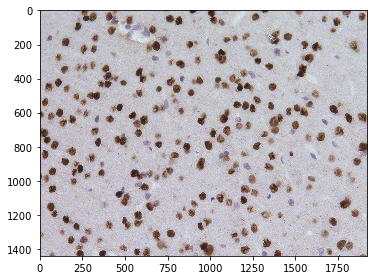

In [4]:
io.imshow(cell)

In [5]:
rows, cols, bands = cell.shape
X = cell.reshape(rows*cols, bands)
print(rows)
print(cols)
print(bands)

1440
1920
3


In [7]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_.reshape(rows, cols)

In [8]:
for i in np.unique(labels):
    blobs = np.int_(morphology.binary_opening(labels == i))
    color = np.around(kmeans.cluster_centers_[i])
    count = len(np.unique(measure.label(blobs))) - 1
    print('Color: {}  >>  Objects: {}'.format(color, count))

Color: [196. 193. 201.]  >>  Objects: 92
Color: [157. 138. 134.]  >>  Objects: 1653
Color: [95. 69. 60.]  >>  Objects: 392


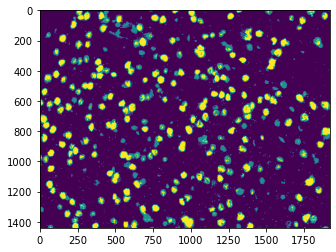

In [9]:
plt.imshow( kmeans.labels_.reshape(1440, 1920) )

In [11]:
cell = io.imread('data/small.png')

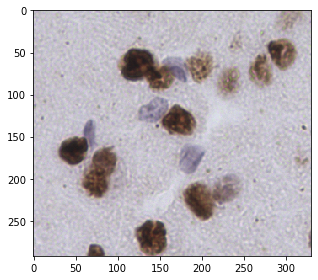

In [12]:
io.imshow(cell)

In [20]:
rows, cols, bands = cell.shape
X = cell.reshape(rows*cols, bands)
print(rows)
print(cols)
print(bands)

292
330
4


In [22]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans.labels_.reshape(rows, cols)

In [23]:
for i in np.unique(labels):
    blobs = np.int_(morphology.binary_opening(labels == i))
    color = np.around(kmeans.cluster_centers_[i])
    count = len(np.unique(measure.label(blobs))) - 1
    print('Color: {}  >>  Objects: {}'.format(color, count))

Color: [151. 136. 138. 255.]  >>  Objects: 78
Color: [196. 192. 201. 255.]  >>  Objects: 9
Color: [ 85.  65.  59. 255.]  >>  Objects: 19


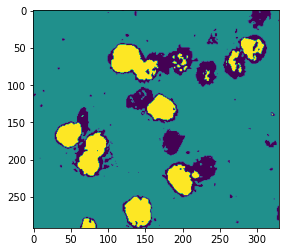

In [24]:
plt.imshow( kmeans.labels_.reshape(rows, cols) )

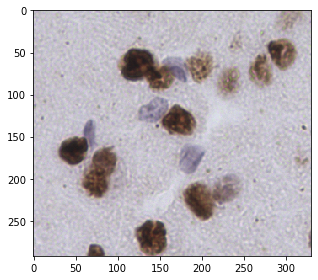

In [25]:
io.imshow(cell)

In [192]:
img = cv2.imread('data/small.png')

In [216]:
blur1 = cv2.bilateralFilter(img, 30,50,50)


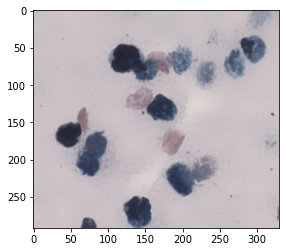

In [217]:
plt.imshow(blur1)


In [218]:
rows, cols, bands = blur1.shape
X = blur1.reshape(rows*cols, bands)
print(rows)
print(cols)
print(bands)

292
330
3


In [219]:
kmeans = KMeans(n_clusters=5, random_state=1).fit(X)
labels = kmeans.labels_.reshape(rows, cols)

In [220]:
for i in np.unique(labels):
    blobs = np.int_(morphology.binary_opening(labels == i))
    color = np.around(kmeans.cluster_centers_[i])
    count = len(np.unique(measure.label(blobs))) - 1
    print('Color: {}  >>  Objects: {}'.format(color, count))

Color: [202. 193. 197.]  >>  Objects: 21
Color: [ 99. 105. 126.]  >>  Objects: 44
Color: [150. 144. 157.]  >>  Objects: 53
Color: [52. 58. 78.]  >>  Objects: 10
Color: [186. 179. 186.]  >>  Objects: 82


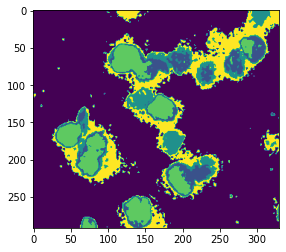

In [221]:
plt.imshow( kmeans.labels_.reshape(rows, cols) )

In [228]:
cells = img[:,:,0]

In [229]:
cells

array([[214, 210, 204, ..., 186, 174, 176],
       [207, 207, 199, ..., 188, 176, 178],
       [199, 196, 198, ..., 186, 187, 178],
       ...,
       [209, 213, 217, ..., 197, 201, 209],
       [206, 207, 211, ..., 198, 206, 213],
       [193, 198, 202, ..., 202, 205, 215]], dtype=uint8)

In [251]:
img = cv2.imread('data/small.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [265]:
gray = cv2.cvtColor(blur1,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

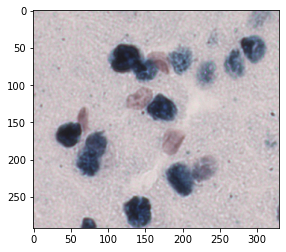

In [255]:
img_orig = cv2.imread('data/small.png')
plt.imshow(img_orig)

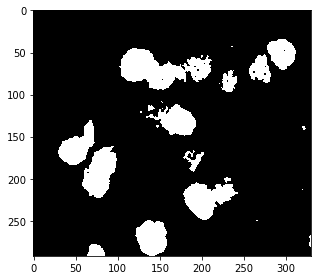

In [266]:
io.imshow(thresh)

In [242]:
ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [243]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)